# Validation analysis of mirror descent stochastic approximation method

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import time
from scipy.stats import wasserstein_distance


## **Preparation du jeu de données**

Avant de lancer la cellule suivante, il faut télécharger le fichier <a href='https://drive.google.com/file/d/1CSZYxJRCnYnspffZ9Hv8FyzvXBdPf1zM/view?usp=sharing'>preprocessed_CAC40.csv</a> \\
Ensuite, uploder le fichier sur colab dans *fichiers*. 

In [ ]:
df = pd.read_csv('preprocessed_CAC40.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head(5)

,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume
0,Accor,2020-04-03,22.99,23.40,23.40,22.99,67
1,Accor,2020-04-02,23.91,22.99,23.91,22.99,250
2,Accor,2020-04-01,24.10,23.83,24.10,23.83,37
3,Accor,2020-03-31,25.04,25.00,25.24,24.99,336
4,Accor,2020-03-30,26.50,25.02,26.50,24.99,415


In [ ]:
entreprises = df.Name.unique()
print(len(entreprises))
entreprises

38


array(['Accor', 'Air Liquide', 'Airbus ', 'ArcelorMittal', 'Atos', 'AXA',
       'BNP Paribas', 'Bouygues', 'Cap Gemini', 'Crédit Agricole',
       'Danone', 'Dassault Systèmes', 'Engie (ex GDF Suez',
       'EssilorLuxottica', 'Hermès (Hermes International', 'Kering',
       'LEGRAND', 'LOréal', 'LVMH Moet Hennessy Louis Vuitton',
       'Michelin (Compagnie Générale d Etablissements Michelin SCPA',
       'Orange', 'Pernod Ricard', 'Peugeot', 'Publicis', 'Renault',
       'SAFRAN', 'Saint-Gobain', 'Sanofi', 'Schneider Electric',
       'Société Générale (Societe Generale', 'Sodexo',
       'STMicroelectronics', 'TOTAL', 'Unibail-Rodamco',
       'Veolia Environnement', 'VINCI', 'Vivendi', 'Worldline SA'],
      dtype=object)

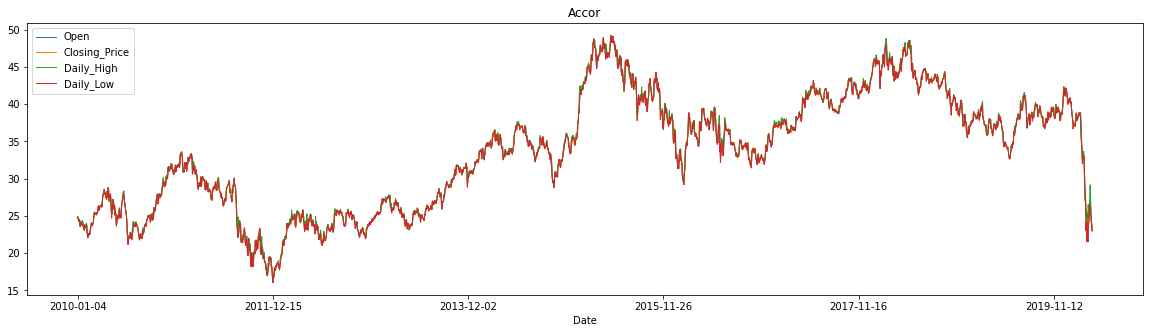

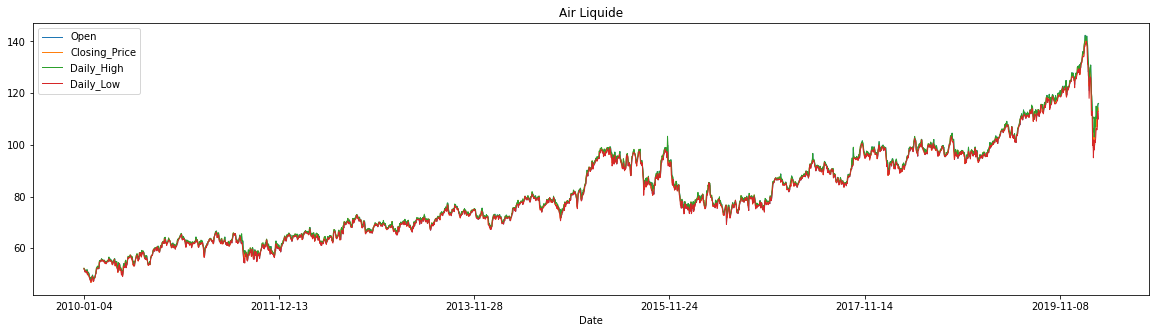

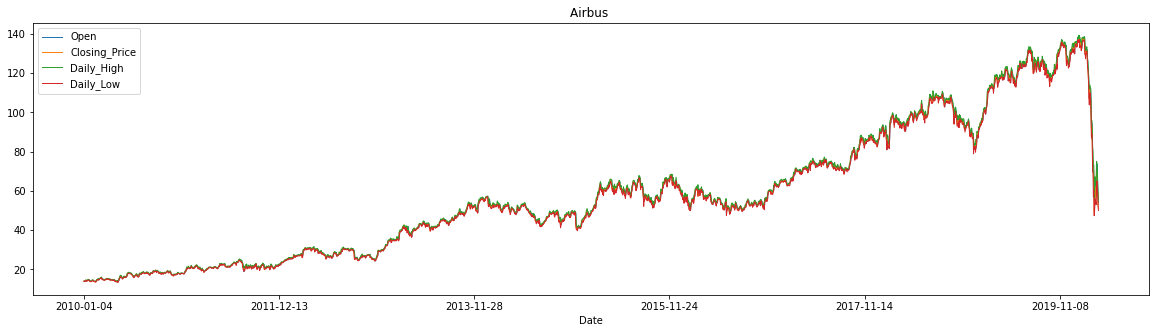

In [ ]:
i = 0
for entreprise in entreprises :
    data = df.loc[df['Name']==entreprise]
    data = data.iloc[::-1]
    data.plot(x = 'Date', y = ['Open','Closing_Price','Daily_High', 'Daily_Low'], title=entreprise, linewidth=1, figsize=(20,5))
    i+=1
    if i == 3 :
      break

## **Descente de gradient classique**

### Implémentation

In [ ]:
#Implémentation de la descente de gradient projeté
#On suppose que le gradient de la fonction f est donné par la fonction df
def Descente_Gradient(f, df, x0, pas, proj, erreur=1e-6, max_iter=1000):
    grad = df(x0)
    chemin = []
    chemin.append(x0)
    x=x0
    i = 0 
    temps = []
    start = time.time()
    while abs(np.linalg.norm(grad)) > erreur and i < max_iter:
        grad = df(x)
        x = proj(x - pas[i]*grad)
        temps.append(time.time() - start)
        chemin.append(x)
        i+=1
    print('Le point final est ({},{}). \nLa valeur de f en ce point est :{}. \nLa valeur du gradient en ce point est ({},{}).'.format(x[0],x[1],f(x),grad[0],grad[1]))
    print('Nombre d\'itreration : {}. \n'.format(i))
    print(len(temps))
    return x, chemin, temps

**Exemple simple sur une fonction convexe classique**

In [ ]:
#Implémentation des fonctions du problème

def f(x):
    return np.array(np.sin(x[0]**2 * x[1]**2))

def df(x):
    return np.array([2*x[0]*np.cos(x[0]**2 * x[1]**2), 2*x[1]*np.cos(x[0]**2 * x[1]**2)])

def proj(x):
    return x

Le point final est (0.00264439613777353,0.00264439613777353). 
La valeur de f en ce point est :4.889968446411675e-11. 
La valeur du gradient en ce point est (0.005320716574997042,0.005320716574997042).
Nombre d'itreration : 1000. 

1000


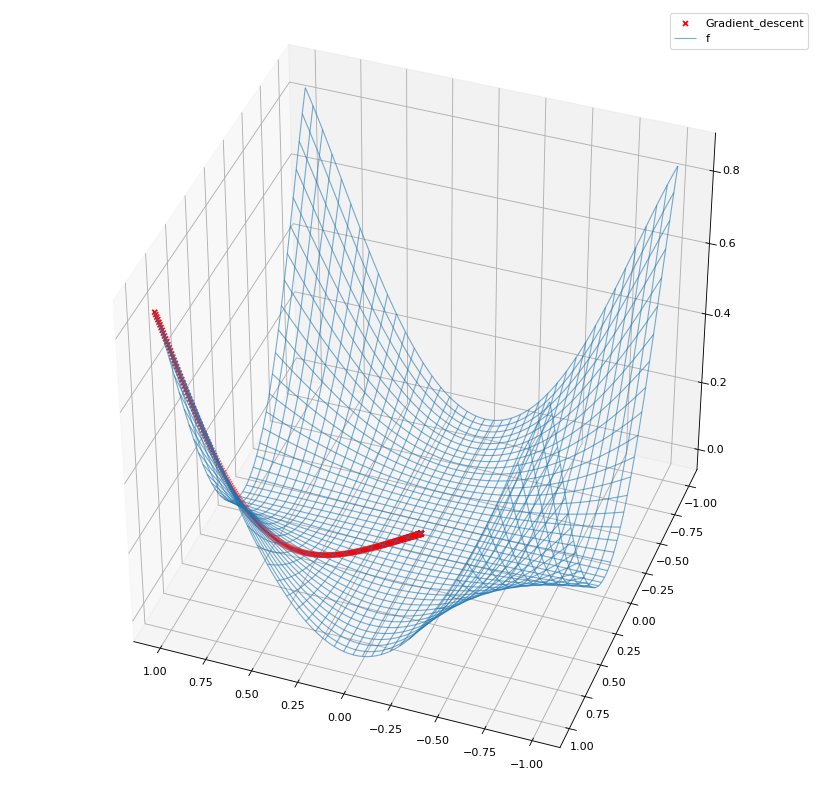

In [ ]:
#Affichage de deux descentes de gradient pour deux points de départ distincts

fig = plt.figure(figsize=(13, 13), dpi=80)
ax = fig.add_subplot(111, projection='3d')

x0 = np.array((1,1)) # premier point de départ 
max_iter=1000
pas = [0.003 for i in range(max_iter)] #suite de pas constant égaux à 0.003
_, X, temps_dg = Descente_Gradient(f,df, x0, pas, proj, max_iter=max_iter)
X1 = X
Z = np.array([f(X[i]) for i in range(len(X))])
Y = np.array([X[i][1] for i in range(len(X))])
X = np.array([X[i][0] for i in range(len(X))])
ax.scatter(X, Y, Z, marker='x',color='r', label='Gradient_descent')

#affichage de la surface en trois dimensions
X = np.linspace(-1, 1, 200)
Y = np.linspace(-1, 1, 200)
Z = np.array([[f(np.array([X[i],Y[j]])) for i in range(len(X))] for j in range(len(Y))])
X, Y = np.meshgrid(X, Y)
ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5,linewidth=1, alpha= 0.6, label='f')

ax.legend()
ax.view_init(40, 110)
plt.show()

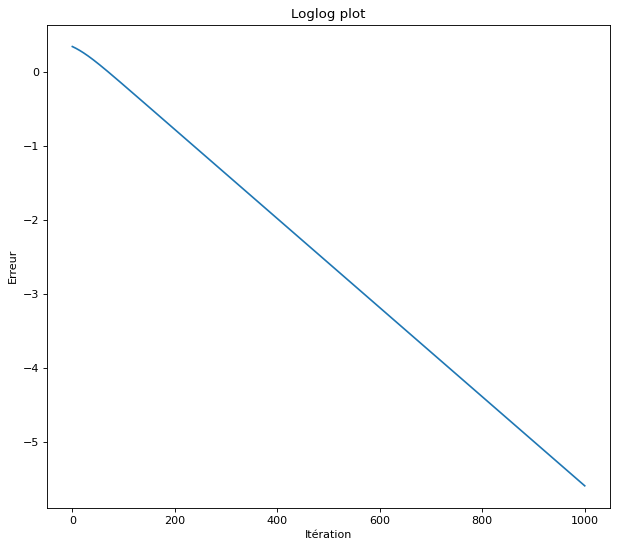

In [ ]:
Erreur_dg = np.linalg.norm(X1, axis=1)
plt.figure(figsize=(20, 8), dpi=80)
ax1 = plt.subplot(121)
ax1.plot(np.arange(len(X1)), np.log(Erreur_dg))
ax1.set_title('Loglog plot')
ax1.set_xlabel('Itération')
ax1.set_ylabel('Erreur')
plt.show()

**Exemple simple sur une fonction avec un point col**

In [ ]:
#Implémentation des fonctions du problème

def f(x):
    return np.array(x[0]**2 - x[1]**2)

def df(x):
    return np.array([2*x[0], -2*x[1] ])

def proj(x):
    return x

Le point final est (0.018493872934712382,0.0). 
La valeur de f en ce point est :0.00034202333612528716. 
La valeur du gradient en ce point est (0.03934866581853698,-0.0).
Nombre d'itreration : 100. 

100
Le point final est (0.9701641873347264,8.147251999851074). 
La valeur de f en ce point est :-65.43649659869047. 
La valeur du gradient en ce point est (2.0641791219887797,-15.372173584624669).
Nombre d'itreration : 36. 

36


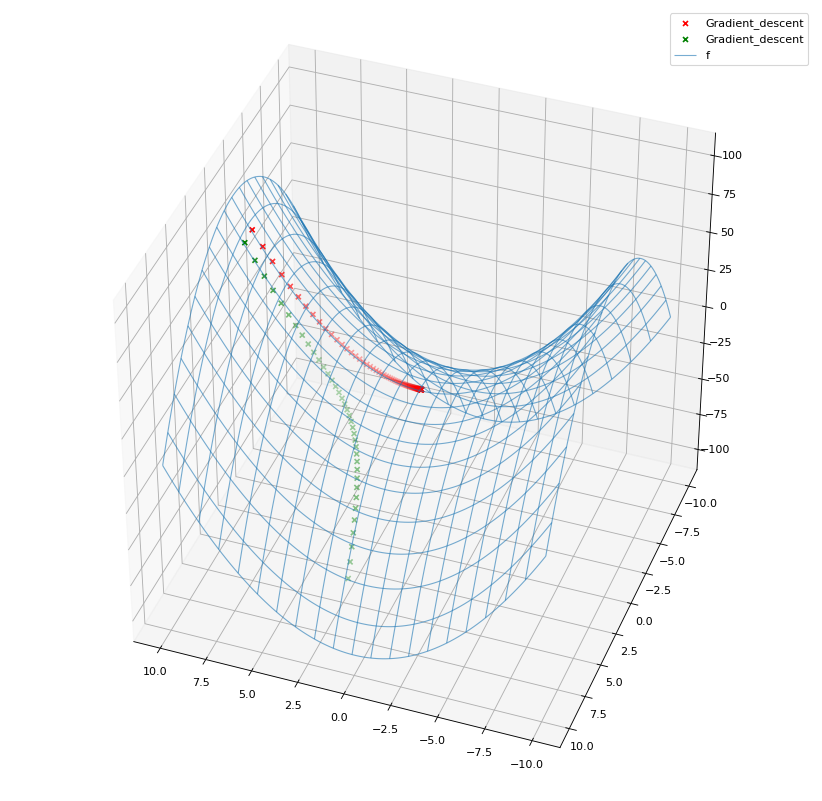

In [ ]:
#Affichage de deux descentes de gradient pour deux points de départ distincts

fig = plt.figure(figsize=(13, 13), dpi=80)
ax = fig.add_subplot(111, projection='3d')

x0 = np.array((9,0)) # premier point de départ 
max_iter=100
pas = [0.03 for i in range(max_iter)] #suite de pas constant égaux à 0.03
_, X, temps_dg = Descente_Gradient(f,df, x0, pas, proj, max_iter=max_iter)
X1 = X
Z = np.array([f(X[i]) for i in range(len(X))])
Y = np.array([X[i][1] for i in range(len(X))])
X = np.array([X[i][0] for i in range(len(X))])
ax.scatter(X, Y, Z, marker='x',color='r', label='Gradient_descent')

x0 = np.array((9,1)) # deuxième point de départ 
max_iter=36
pas = [0.03 for i in range(max_iter)] #suite de pas constant égaux à 0.03

_, X, t_ = Descente_Gradient(f,df, x0, pas, proj, max_iter=max_iter)
Z = np.array([f(X[i]) for i in range(len(X))])
Y = np.array([X[i][1] for i in range(len(X))])
X = np.array([X[i][0] for i in range(len(X))])
ax.scatter(X, Y, Z, marker='x',color='g', label='Gradient_descent')

#affichage de la surface en trois dimensions
X = np.linspace(-10, 10, 100)
Y = np.linspace(-10, 10, 100)
Z = np.array([[f(np.array([X[i],Y[j]])) for i in range(len(X))] for j in range(len(Y))])
X, Y = np.meshgrid(X, Y)
ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5,linewidth=1, alpha= 0.6, label='f')

ax.legend()
ax.view_init(40, 110)
plt.show()

**Loglog plot de l'exemple précédent**

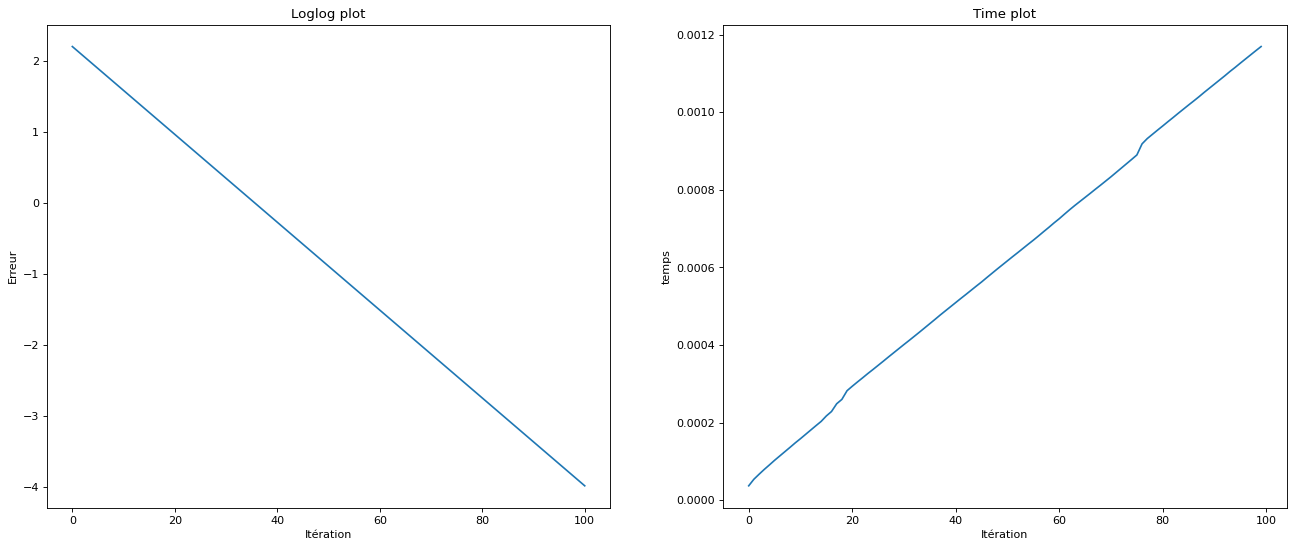

In [ ]:
Erreur_dg = np.linalg.norm(X1, axis=1)
plt.figure(figsize=(20, 8), dpi=80)
ax1 = plt.subplot(121)
ax1.plot(np.arange(len(X1)), np.log(Erreur_dg))
ax1.set_title('Loglog plot')
ax1.set_xlabel('Itération')
ax1.set_ylabel('Erreur')
ax2 = plt.subplot(122)
ax2.set_title('Time plot')
ax2.plot(np.arange(len(X1)-1), temps_dg)
ax2.set_xlabel('Itération')
ax2.set_ylabel('temps')
plt.show()

On retrouve bien une vitesse de convergence exponentielle : cas de la minimisation d'une fonction strictement convexe. 

## **Descente de gradient mirroir**

### Rappel théorique

On cherche à déterminer : $$x^* = \text{arg}\min_{x \in X} f(x)$$

où $X$ est un ensemble non-vide convexe compacte de $\mathbb{R}^n$ 
et $f : X → \mathbb{R} $ : convexe Lipschitz continue. \\

On définit la divergence de Bregman $V : X ×X → \mathbb{R}_+$ : $$ V_w(x,y) = w(y) - w(x) - ∇w(x)^{T}(y - x)$$ 
où $w : X → R $ est une fonction convexe.  \\

L'algorithme de la descente miroir (MDA) est commme suit :
$$x_{t+1} = \nabla \phi^*( \nabla w(x_k)  - \alpha_k \nabla f(x_k) )$$ \\
avec $\phi^* = sup_{z \in X}[<z,x> - w(z)]$




### Implémentation

On considère pour les calculs la divergence de Bregman associée à la fonction convexe : $$h(x) = \sum_{i=1}^{n} x_i \log(x_i) - x_i$$
également appelée entropie.

In [ ]:
def Descente_Mirroir(f, df, grad_h, grad_h_inverse, x0, pas, proj, erreur=1e-6, max_iter=1000):
    x=x0
    chemin = []
    chemin.append(x0)
    i = 0 
    print(np.linalg.norm(df(x)))
    temps = []
    start = time.time()
    while i < max_iter and np.linalg.norm(df(x)) >= erreur :  
        theta = grad_h(x)
        theta = theta - pas[i]*df(x)
        x1 = grad_h_inverse(theta)
        x = proj(x1)
        temps.append(time.time() - start) 
        chemin.append(x)
        i+=1
        
    print('Nombre d\'itreration : ', i)
    return x, chemin, temps

In [ ]:
#implémentation des fonctions du problème

def f(x):
    return np.array(np.sin(x[0]**2 * x[1]**2))

def df(x):
    return np.array([2*x[0]*np.cos(x[0]**2 * x[1]**2), 2*x[1]*np.cos(x[0]**2 * x[1]**2)])

def h(x) :
    return np.sum(x*np.log(x) - x)

def grad_h(x):
    return np.log(x)

def grad_h_inverse(x):
    return np.exp(x)

def Bregman(w, grad_w ,x,y):
    return w(y) - w(x) - grad_w(x).T@(y - x)

def proj(x):
    return x

1.528205697480359
Nombre d'itreration :  100
2.1665540391889446
Nombre d'itreration :  1000


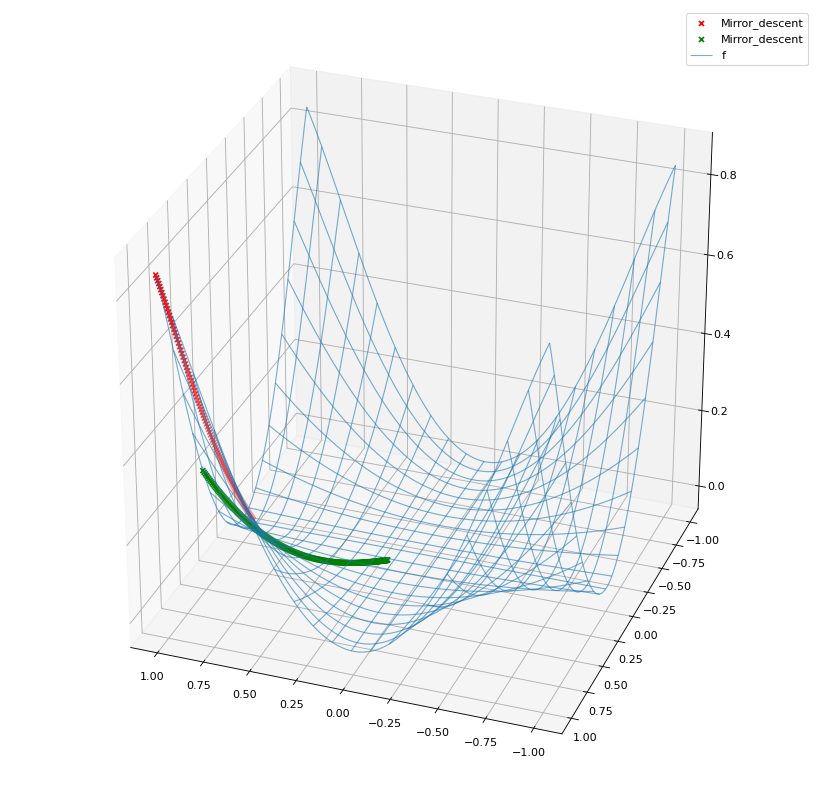

In [ ]:
fig = plt.figure(figsize=(13, 13), dpi=80)
ax = fig.add_subplot(111, projection='3d')

x0 = np.array((1,1)) # point de départ 

max_iter=100
pas = [0.003 for i in range(max_iter)]
_, X, temps_dm = Descente_Mirroir(f, df, grad_h, grad_h_inverse, x0, pas, proj, 1e-3, max_iter=max_iter)
X1 = X
Z = np.array([f(X[i]) for i in range(len(X))])
Y = np.array([X[i][1] for i in range(len(X))])
X = np.array([X[i][0] for i in range(len(X))])
ax.scatter(X, Y, Z, marker='x',color='r', label='Mirror_descent')

x0 = np.array((1,0.5)) # point de départ 

max_iter=1000
pas = [0.003 for i in range(max_iter)]
_, X, t1_ = Descente_Mirroir(f, df, grad_h, grad_h_inverse, x0, pas, proj, 10**(-3), max_iter=max_iter)
Z = np.array([f(X[i]) for i in range(len(X))])
Y = np.array([X[i][1] for i in range(len(X))])
X = np.array([X[i][0] for i in range(len(X))])
ax.scatter(X, Y, Z, marker='x',color='g', label='Mirror_descent')

X = np.linspace(-1, 1, 100)
Y = np.linspace(-1, 1, 100)
Z = np.array([[f(np.array([X[i],Y[j]])) for i in range(len(X))] for j in range(len(Y))])
X, Y = np.meshgrid(X, Y)

ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5,linewidth=1, alpha= 0.6, label='f')

ax.legend()
ax.view_init(30, 110)
plt.show()

**Log log plot de l'exemple précédent**


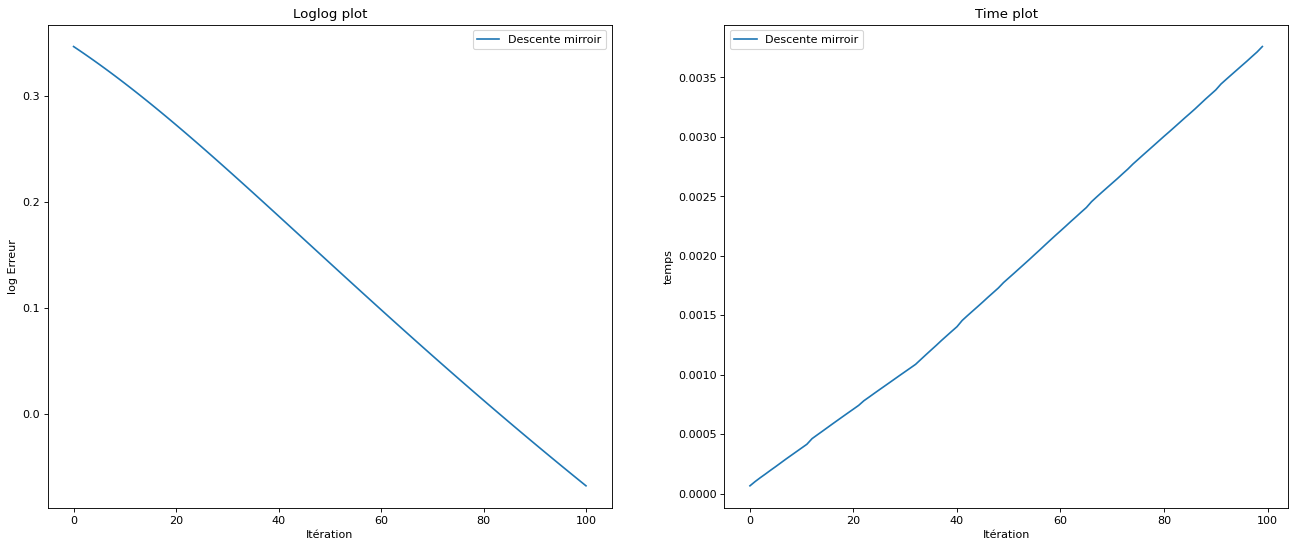

In [ ]:
Erreur = np.linalg.norm(X1, axis=1)
plt.figure(figsize=(20, 8), dpi=80)
ax1 = plt.subplot(121)
ax1.plot(np.arange(len(X1)), np.log(Erreur), label='Descente mirroir')
ax1.set_title('Loglog plot')
ax1.set_xlabel('Itération')
ax1.set_ylabel('log Erreur')
ax1.legend()

ax2 = plt.subplot(122)
ax2.set_title('Time plot')
ax2.plot(np.arange(len(X1)-1), temps_dm, label='Descente mirroir')
ax2.set_xlabel('Itération')
ax2.set_ylabel('temps')
ax2.legend()
plt.show()

## **Comparaison des deux méthodes sur un cône**

In [ ]:
def f(x) : 
    return (1-x[0])**2 + (x[1] - x[0])**2

def df(x):
    return np.array([-2*(1 - x[0]) - 2*(x[1]-x[0]), 2*(x[1]-x[0])])

In [ ]:
def project_cone(y,p=0):
    ## p étant la direction du cône
    y_p = y[p]
    y_sp = np.concatenate((y[:p] , y[p+1:] ))
    if np.linalg.norm(y_sp)**2 <= y_p**2 :
        return y
    elif np.abs(y_p) < 1e-8:
        x = y/2
        x[p] = np.linalg.norm(np.concatenate((y[:p] , y[p+1:] )))/2
        return x
    c = np.linalg.norm(y_sp/y_p)
    if c - 1 < 0 :
        lamb = -(c+1)/(1-c)
    else :
        lamb = (c-1)/(1+c)
    x = y / (1+lamb)
    x[p] = y_p/(1-lamb)
    return x

Le point final est (1.5545944564745904,1.5545944564745904). 
La valeur de f en ce point est :0.3075750111523463. 
La valeur du gradient en ce point est (1.1203928413628077,8.881784197001252e-16).
Nombre d'itreration : 100. 

100
8.48528137423857
Nombre d'itreration :  100


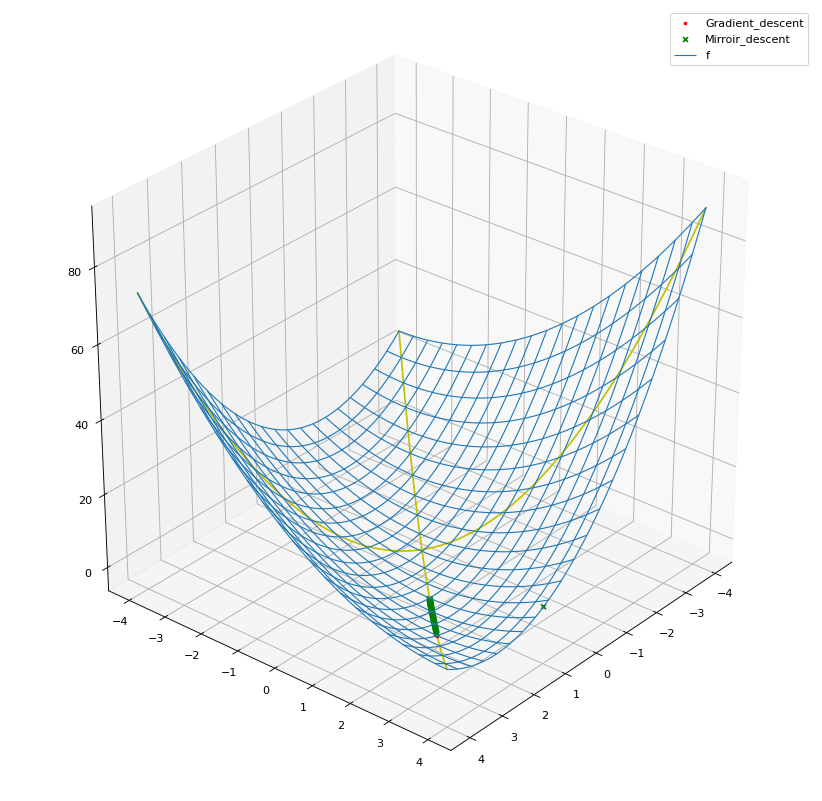

In [ ]:
fig = plt.figure(figsize=(13, 13), dpi=80)
ax = fig.add_subplot(111, projection='3d')

x0 = np.array([1,4]) # point de départ 

max_iter=100
pas = [0.01 for i in range(max_iter)]
_, X, temps_dg = Descente_Gradient(f,df, x0, pas, project_cone, max_iter=max_iter)
Z = np.array([f(X[i]) for i in range(len(X))])
Y = np.array([X[i][1] for i in range(len(X))])
X = np.array([X[i][0] for i in range(len(X))])
ax.scatter(X, Y, Z, marker='.',color='r', alpha = 1, label='Gradient_descent')


max_iter=100
pas = [0.01 for i in range(max_iter)]
_, X, temps_dm = Descente_Mirroir(f, df, grad_h, grad_h_inverse, x0, pas, project_cone, 1e-3, max_iter=max_iter)
X1 = X
Z = np.array([f(X[i]) for i in range(len(X))])
Y = np.array([X[i][1] for i in range(len(X))])
X = np.array([X[i][0] for i in range(len(X))])
ax.scatter(X, Y, Z, marker='x',color='g', alpha = 1, label='Mirroir_descent')

X = np.linspace(-4, 4, 100)
Y = np.linspace(-4, 4, 100)
Z_1 = np.array([f(np.array([X[i],Y[i]])) for i in range(len(X))])
Z_2 = np.array([f(np.array([X[i],-Y[i]])) for i in range(len(X))])
ax.plot(X,Y,Z_1, color = 'y')
ax.plot(X,-Y,Z_2,color = 'y')

#X = np.linspace(-2, 4, 100)
#Y = np.linspace(-2, 4, 100)
Z = np.array([[f(np.array([X[i],Y[j]])) for i in range(len(X))] for j in range(len(Y))])
X, Y = np.meshgrid(X, Y)

ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5,linewidth=1, label='f')

ax.legend()
ax.view_init(30, 40)
plt.show()

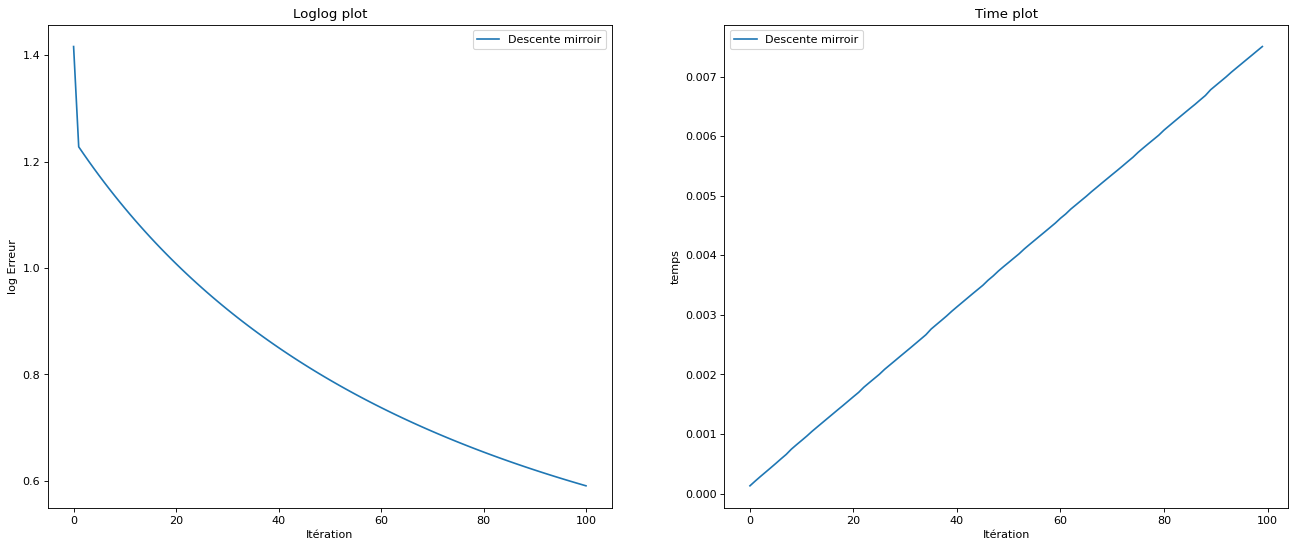

In [ ]:
Erreur = np.linalg.norm(X1, axis=1)
plt.figure(figsize=(20, 8), dpi=80)
ax1 = plt.subplot(121)
ax1.plot(np.arange(len(X1)), np.log(Erreur), label='Descente mirroir')
ax1.set_title('Loglog plot')
ax1.set_xlabel('Itération')
ax1.set_ylabel('log Erreur')
ax1.legend()

ax2 = plt.subplot(122)
ax2.set_title('Time plot')
ax2.plot(np.arange(len(X1)-1), temps_dm, label='Descente mirroir')
ax2.set_xlabel('Itération')
ax2.set_ylabel('temps')
ax2.legend()
plt.show()

## **Application au simplexe**

On définit le simplexe par : 
$$S = \{ x \in \mathbb{R}^n : x \geq 0, \mathbb{1}^T x = 1 \}$$
$S$ peut être vu comme l'ensemble des mesures de probabilité discrètes de cardinal $n$.

On souhaite résoudre le problème d'optimisation :
$$x^* = \text{arg}\min_{x \in S} f(x)$$


In [ ]:
#Implémentation d'une fonction problème

def f(x) : 
    return (1-x[0])**2 + (x[1] - x[0])**2

def df(x):
    return np.array([-2*(1 - x[0]) - 2*(x[1]-x[0]), 2*(x[1]-x[0])])

### Algorithme de projection euclidienne sur le simplexe S

On cherche à résoudre : 
$$P(y) = \text{arg}\min_{x \in S} \lVert x-y \rVert^2 $$

Pour cela, on possède l'algorithme suivant : \\


***Input*** : $y \in \mathbb{R}^n$ \\
$- Sort~ y : y_{i_1} ≥ y_{i_2} ≥ · · · ≥ y_{i_n}$ \\
$- Find~ ρ = max \{1 ≤ j ≤ n: y_{i_j}+ \frac{1}{i_j}(1 - \sum_{k = 1}^{j}y_{i_k}) > 0  \}$ \\
$- Define ~λ = \frac{1}{i_{ρ}}(1 - \sum_{k = 1}^{ρ}y_{i_k}) $ \\
$- Define ~x ~by ~x_{i_k} = max\{y_{i_k} + λ, 0\} ~for ~k = 0, ..., n. $ \\
***Output***: $x$


In [ ]:
def project_simplexe(y):
  y = np.array(y)
  u = -np.sort(-y)
  rho = len( (u - 1 > 0).astype(int))
  mu = (1 - np.sum(u[:rho]))/rho
  x = y + mu
  x[x < 0] = 0
  return x

Le point final est (0.5999999999999556,0.4000000000000445). 
La valeur de f en ce point est :0.19999999999999998. 
La valeur du gradient en ce point est (-0.4000000000002708,-0.3999999999998194).
Nombre d'itreration : 2000. 

2000
Le point final est (0.6000000000000301,0.3999999999999699). 
La valeur de f en ce point est :0.2. 
La valeur du gradient en ce point est (-0.3999999999998165,-0.40000000000012226).
Nombre d'itreration : 2000. 

2000


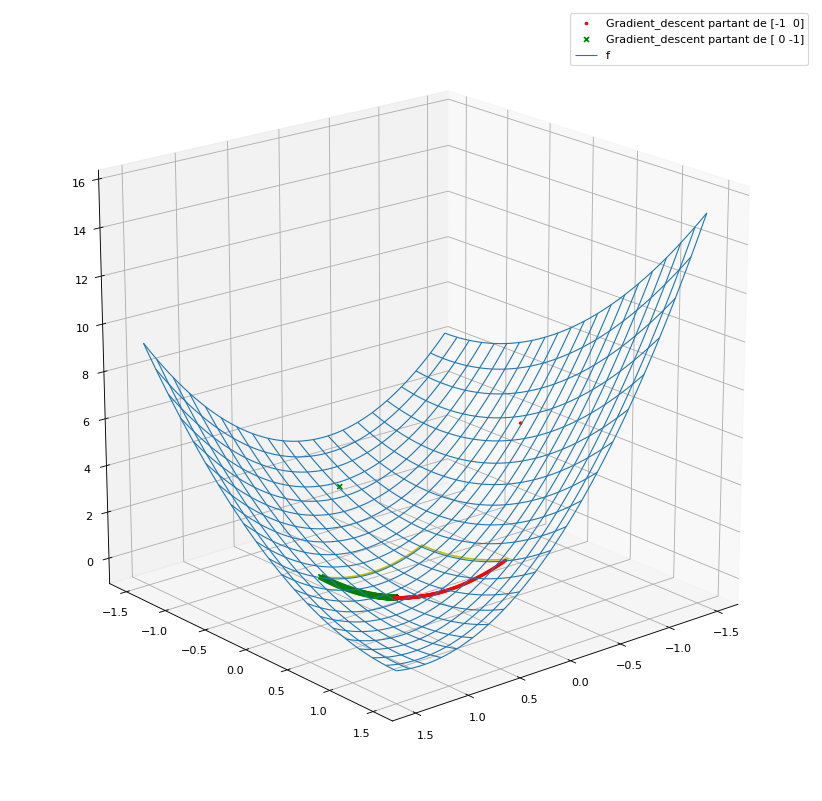

In [ ]:
fig = plt.figure(figsize=(13, 13), dpi=80)
ax = fig.add_subplot(111, projection='3d')

x0 = np.array([-1,0]) # point de départ 

max_iter=2000
pas = [0.003 for i in range(max_iter)]
_, X, temps_dg= Descente_Gradient(f,df, x0, pas, project_simplexe, max_iter=max_iter)
Erreur_dg = np.linalg.norm(X - np.array([0.6,0.4]), axis=1)
Z = np.array([f(X[i]) for i in range(len(X))])
Y = np.array([X[i][1] for i in range(len(X))])
X = np.array([X[i][0] for i in range(len(X))])
ax.scatter(X, Y, Z, marker='.',color='r', alpha = 1, label='Gradient_descent partant de {}'.format(x0))

x0 = np.array([0,-1]) # point de départ 

max_iter=2000
pas = [0.003 for i in range(max_iter)]
_, X, t_ = Descente_Gradient(f,df, x0, pas, project_simplexe, max_iter=max_iter)
Z = np.array([f(X[i]) for i in range(len(X))])
Y = np.array([X[i][1] for i in range(len(X))])
X = np.array([X[i][0] for i in range(len(X))])
ax.scatter(X, Y, Z, marker='x',color='g', alpha = 1, label='Gradient_descent partant de {}'.format(x0))

X = np.linspace(0, 1, 100)
Y = np.linspace(0, 1, 100)
Z_1 = np.array([f(np.array([X[i],0])) for i in range(len(X))])
Z_2 = np.array([f(np.array([0,Y[i]])) for i in range(len(X))])
Z_3 = np.array([f(np.array([X[i],-Y[i] +1])) for i in range(len(X))])
ax.plot([0 for i in range(len(X))],Y,Z_2, color = 'y')
ax.plot(X,[0 for i in range(len(Y))],Z_1, color = 'y')
ax.plot(X,-Y +1,Z_3,color = 'y')

X = np.linspace(-1.5, 1.5, 100)
Y = np.linspace(-1.5, 1.5, 100)
Z = np.array([[f(np.array([X[i],Y[j]])) for i in range(len(X))] for j in range(len(Y))])
X, Y = np.meshgrid(X, Y)

ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5,linewidth=1, label='f')

ax.legend()
ax.view_init(20, 50)

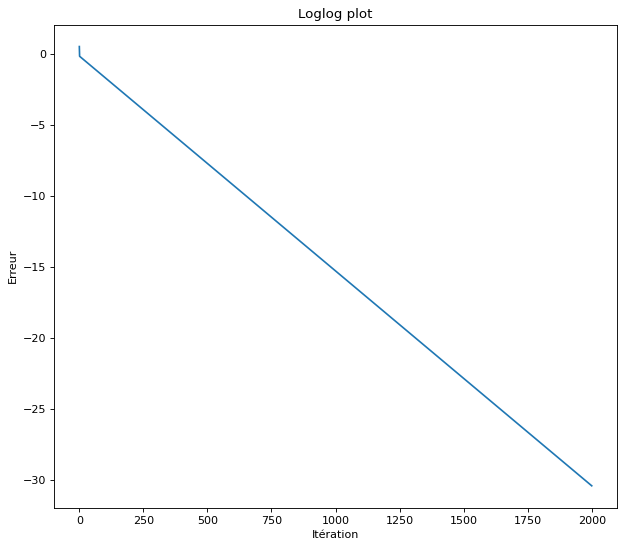

In [ ]:
plt.figure(figsize=(20, 8), dpi=80)
ax1 = plt.subplot(121)
ax1.plot(np.arange(len(Erreur_dg)), np.log(Erreur_dg))
ax1.set_title('Loglog plot')
ax1.set_xlabel('Itération')
ax1.set_ylabel('Erreur')
"""
ax2 = plt.subplot(122)
ax2.set_title('Time plot')
ax2.plot(np.arange(len(Erreur_dg)-1), temps_dg)
ax2.set_xlabel('Itération')
ax2.set_ylabel('temps')
"""
plt.show()

### Algorithme de projection selon la divergence de Bregman $V$ sur le simplexe S

La projection sur le simplexe :
$$\underset{x \in \mathbb{R}^n}{\text{min}} ~V(x,y) $$
$$ s.c.   ~~  x^T \mathbb{1} = 1 $$
$$ ~~~~~~~~~~~~~ x \geq 0 $$


$$P(y) = argmin_{x \in S} V(x,y) $$

On prend : \\
$w: x \in \mathbb{R_+}^n → ∑_i x_i log(x_i) - x_i$ 
\\

On écrit le lagrangien : 
$\mathcal{L}(x,λ,μ) = w(x) - w(y) - <log(y),x-y> + λ(1 - ∑_ix_i) - μ.x$

$ \hspace{1.5cm} \left\{ 
    \begin{array}{ll}
        μ.x = 0 & \mbox{(1)} \\
        ∑_i x_i = 1 & \mbox{(2)} \\
        log(x) - log(y) + λ.\mathbb{1} - μ = 0 & \mbox{(3)}
    \end{array}
  \right.
$ \\
En utilisant l'équation $(3)$ on a : \\
$ ∀ i \in \{1, ..., n\}, ~~ x_i = y_i ~e^{(μ_i - λ)} $ \\

-   si $y_i = 0$, alors $x_i=0$.  
-   sinon $y_i \neq 0$, alors $x_i \neq 0$ et donc d'après l'équation $(1)$ $μ_i = 0$.

Ainsi, $ ∀ i \in \{1, ..., n\}, ~~ x_i = y_i ~e^{-λ} $
En utilisant l'équation $(2)$ on a : \\
$$ e^{-λ} = \frac{1}{∑_i y_i} $$

Enfin, la solution générale du problème est : \\
$$ ∀ i \in \{1, ..., n\}, ~~ x_i = \frac{y_i}{∑_i y_i} $$





In [ ]:
def project_simplexe_bregman(y):
  y = np.array(y)
  if (y == 0).all():
    return np.zeros(y.shape) 
  return y/np.sum(y)

def Descente_Mirroir_B(df, grad_h, grad_h_inverse, x0, pas, proj, erreur=1e-6, max_iter=1000):
    x, chemin = Descente_Mirroir(df, grad_h, grad_h_inverse, x0, pas, proj, erreur=1e-6, max_iter=1000)
    x = np.sum(np.array([chemin[i]*pas[i]/np.sum(pas)  for i in range(len(chemin))]))
    return x, chemin

def h(x) :
    return np.sum(x*np.log(x) - x)

def grad_h(x):
    return np.log(x)

def grad_h_inverse(x):
    return np.exp(x)

def Bregman(w, grad_w ,x,y):
    return w(y) - w(x) - grad_w(x).T@(y - x)

3.577708763999664
Nombre d'itreration :  200


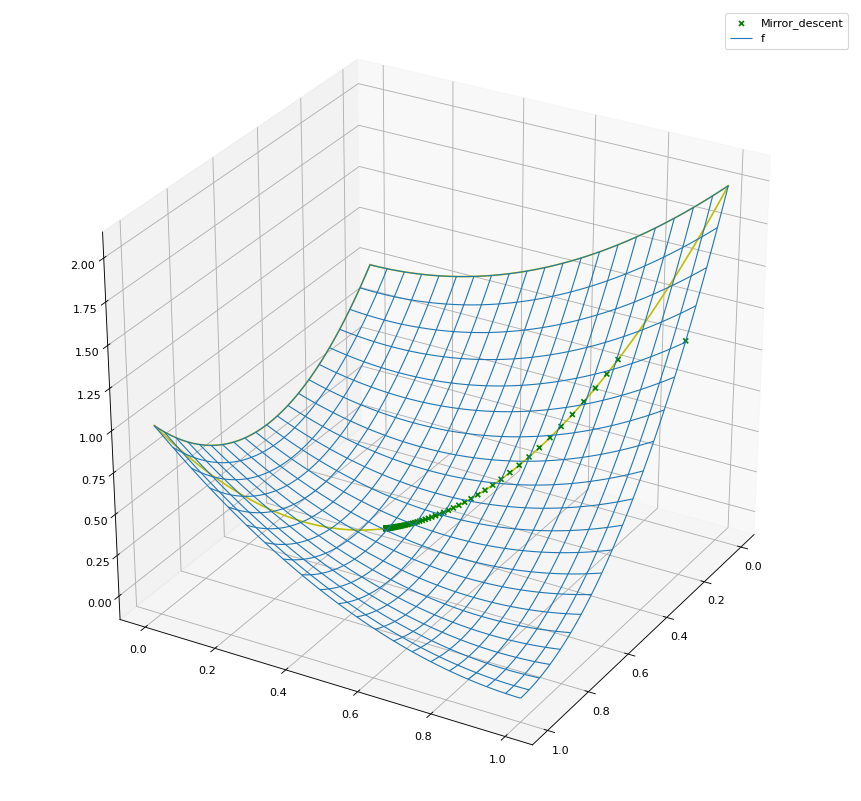

In [ ]:
fig = plt.figure(figsize=(30, 13), dpi=80)
#ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

'''
x0 = np.array([0.1,0.4]) # point de départ 

max_iter=10000
pas = [0.003 for i in range(max_iter)]
_, X, temps_dm = Descente_Mirroir(f, df, grad_h, grad_h_inverse, x0, pas, project_simplexe_bregman, 10**(-3), max_iter=max_iter)
Z = np.array([f(X[i]) for i in range(len(X))])
Y = np.array([X[i][1] for i in range(len(X))])
X = np.array([X[i][0] for i in range(len(X))])
ax1.scatter(X, Y, Z, marker='.',color='r', alpha = 1, label='Gradient_descent')
'''

x0 = np.array([0.2,1]) # point de départ 

max_iter=200
pas = [0.03 for i in range(max_iter)]
_, X, temps_dm = Descente_Mirroir(f, df, grad_h, grad_h_inverse, x0, pas, project_simplexe_bregman, 10**(-3), max_iter=max_iter)
Erreur_dg = np.linalg.norm(X - np.array([0.6,0.4]), axis=1)
Z = np.array([f(X[i]) for i in range(len(X))])
Y = np.array([X[i][1] for i in range(len(X))])
X = np.array([X[i][0] for i in range(len(X))])
ax2.scatter(X, Y, Z, marker='x',color='g', alpha = 1, label='Mirror_descent')


X = np.linspace(0, 1, 100)
Y = np.linspace(0, 1, 100)
Z_1 = np.array([f(np.array([X[i],0])) for i in range(len(X))])
Z_2 = np.array([f(np.array([0,Y[i]])) for i in range(len(X))])
Z_3 = np.array([f(np.array([X[i],-Y[i] +1])) for i in range(len(X))])
'''
ax1.plot([0 for i in range(len(X))],Y,Z_2, color = 'y')
ax1.plot(X,[0 for i in range(len(Y))],Z_1, color = 'y')
ax1.plot(X,-Y +1,Z_3,color = 'y')
'''
ax2.plot([0 for i in range(len(X))],Y,Z_2, color = 'y')
ax2.plot(X,[0 for i in range(len(Y))],Z_1, color = 'y')
ax2.plot(X,-Y +1,Z_3,color = 'y')

X = np.linspace(0, 1, 100)
Y = np.linspace(0, 1, 100)
Z = np.array([[f(np.array([X[i],Y[j]])) for i in range(len(X))] for j in range(len(Y))])
X, Y = np.meshgrid(X, Y)

#ax1.plot_wireframe(X, Y, Z, rstride=5, cstride=5,linewidth=1, label='f')
ax2.plot_wireframe(X, Y, Z, rstride=5, cstride=5,linewidth=1, label='f')

#ax1.legend()
ax2.legend()
##ax1.view_init(30, 30)
ax2.view_init(30, 30)

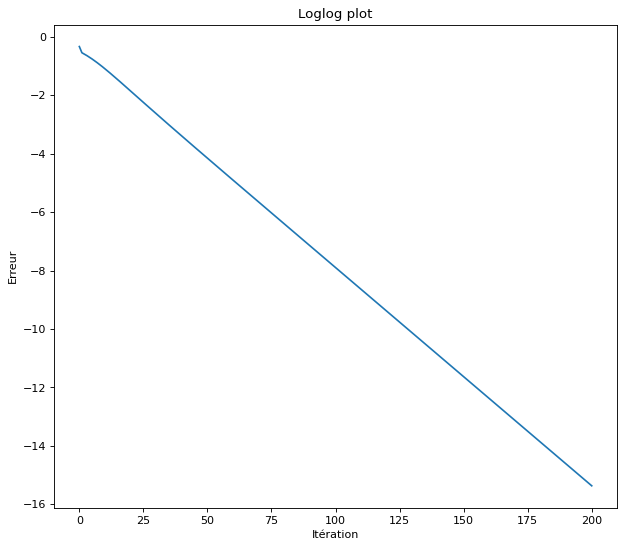

In [ ]:
plt.figure(figsize=(20, 8), dpi=80)
ax1 = plt.subplot(121)
ax1.plot(np.arange(len(Erreur_dg)), np.log(Erreur_dg))
ax1.set_title('Loglog plot')
ax1.set_xlabel('Itération')
ax1.set_ylabel('Erreur')
"""
ax2 = plt.subplot(122)
ax2.set_title('Time plot')
ax2.plot(np.arange(len(Erreur_dg)-1), temps_dg)
ax2.set_xlabel('Itération')
ax2.set_ylabel('temps')
"""
plt.show()

***Comparaison des deux méthodes***

Le point final est (0.5999999999999999,0.40000000000000013). 
La valeur de f en ce point est :0.2. 
La valeur du gradient en ce point est (-0.4000000000000008,-0.39999999999999947).
Nombre d'itreration : 2000. 

2000
3.577708763999664
Nombre d'itreration :  2000


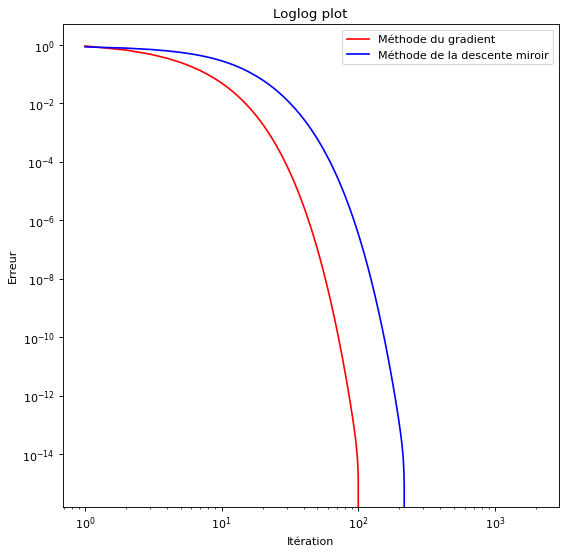

In [ ]:
x0 = np.array([0.2,1]) # point de départ 
max_iter=2000
pas = [0.03 for i in range(max_iter)]

_, X_gradient, temps_dg = Descente_Gradient(f,df, x0, pas, project_simplexe, max_iter=max_iter)
f_gradient = np.array([f(X_gradient[i]) for i in range(len(X_gradient))])
_, X_mirroir, temps_dm  = Descente_Mirroir(f, df, grad_h, grad_h_inverse, x0, pas, project_simplexe_bregman, 10**(-3), max_iter=max_iter)
f_mirroir = np.array([f(X_mirroir[i]) for i in range(len(X_mirroir))])

Erreur_gradient = f_gradient - 0.200000000000008
Erreur_mirroir = f_mirroir - 0.200000000000008
plt.figure(figsize=(8, 8), dpi=80)
plt.loglog(np.arange(1,len(X_gradient)), Erreur_gradient[1:], color = "r",label = "Méthode du gradient")
plt.loglog(np.arange(1,len(X_gradient)), Erreur_mirroir[1:], color = "b", label = "Méthode de la descente miroir")
plt.title('Loglog plot')
plt.legend()
plt.xlabel('Itération')
plt.ylabel('Erreur')
plt.show()

A commenter

## **Application à la simulation de portefeuille**

On simule la valeur de 10 actions pour un temps de 1000 à l'aide d'un mouvement brownien

In [ ]:
def simuler_action( mu, sigma, nombre=10, temps=1000):
    S_init = [1 for i in range(nombre)]
    T = np.linspace(0,1,temps) 
    S = []
    delta_t = 1/1000
    for i in range(len(S_init)):
      s = S_init[i]
      B = np.cumsum(np.random.normal(loc=0, scale=np.sqrt(delta_t), size=len(T)))
      S_i = []
      mu_i = mu[i]
      sigma_i = sigma[i]
      for t in range(len(T)):
        S_i.append(s*np.exp(mu_i*t*delta_t + sigma_i*B[t]) - s)
      S.append(S_i)
    return np.array(S)


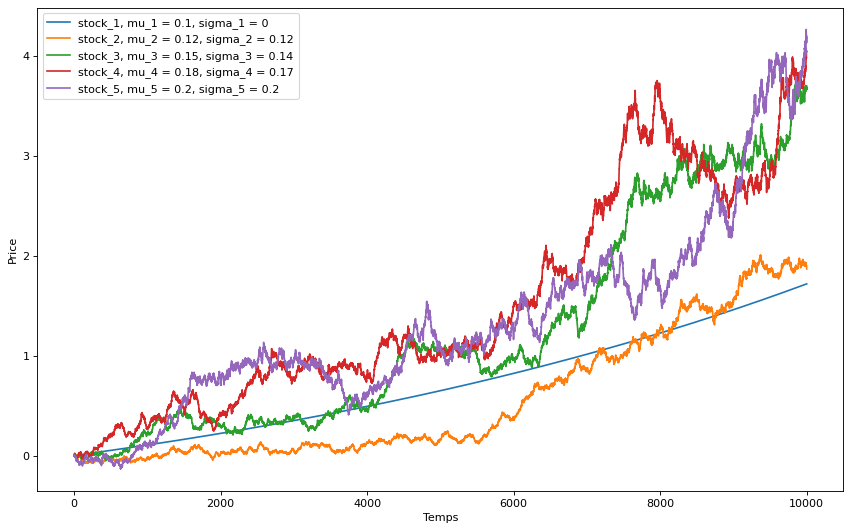

In [ ]:

mu_list = [0.1,0.12,0.15,0.18,0.2,0.22]
sigma_list = [0,0.12,0.14,0.17,0.2,0.22]
S = simuler_action(mu_list, sigma_list, nombre = 5, temps = 10000)

def afficher(S):
    plt.figure(figsize=(13, 8), dpi=80)
    for i in range(S.shape[0]):
      plt.plot(np.arange(S.shape[1]), S[i], label=f'stock_{i+1}, mu_{i+1} = {mu_list[i]}, sigma_{i+1} = {sigma_list[i]}')
    plt.xlabel('Temps')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

afficher(S)

Nous cherchons une solution du problème suivant : \\
 $$\underset{x \in S}{\text{max}} ~~ \mathbb{E}[x.u]$$

avec $S$ le simplexe de dimension $n$, $u \in \mathbb{R}^n$ le prix des différentes actions.

In [ ]:
def simuler_action_2(n,S0_list,mu_list,sigma_list,M=1000,T=1):
  B = np.random.normal(loc = 0, scale = np.sqrt(T), size = (M,n))
  S = np.array([S0_list[i] * np.exp(sigma_list[i]*B[:,i] + (mu_list[i] - sigma_list[i]**2/2)*T) - S0_list[i] for i in range(n)])
  return S.T

In [ ]:
mu_list = [1, 0.0,0.3,0.5,0.1]
sigma_list = [0.2, 0.5, 0.1, 0.4, 0.3]
S = simuler_action_2(5,[1,1,1,1,1],mu_list,sigma_list)
print(S.shape)

(1000, 5)


In [ ]:
def F(x,u):
  return x.T@u

def G(x,u):
  return u

In [ ]:
def Descente_Mirroir_sto(S, G, grad_h, grad_h_inverse, x0, pas, proj, erreur=1e-6, max_iter=1000):
    x=x0
    chemin = []
    chemin.append(x0)
    i = 0 
    temps = []
    start = time.time()
    while True :  
        theta = grad_h(x)
        chi = S[i,:]
        theta = theta + pas[i]*G(x,chi)
        x1 = grad_h_inverse(theta)
        x = proj(x1)  
        temps.append(time.time()- start)
        chemin.append(x)
        if i >= max_iter-1 or np.linalg.norm(df(x)) < erreur : 
          break
        i+=1
    print(len(chemin), len(pas))
    x = np.sum(np.array([chemin[j+1]*pas[j]/np.sum(pas)  for j in range(len(pas))]), axis=0)
    print('Nombre d\'itreration : ', i)
    return x, np.array(chemin), np.array(temps)



###**Exemple simple de la descente mirroir stochastique:**

1001 1000
Nombre d'itreration :  999
Les poids attribués par le modèle sont respectivement :
	 [9.96468521e-01 6.54183049e-04 7.28818470e-04 7.17949641e-04
 7.68401632e-04 6.62126025e-04]
La somme des poids : 1.0


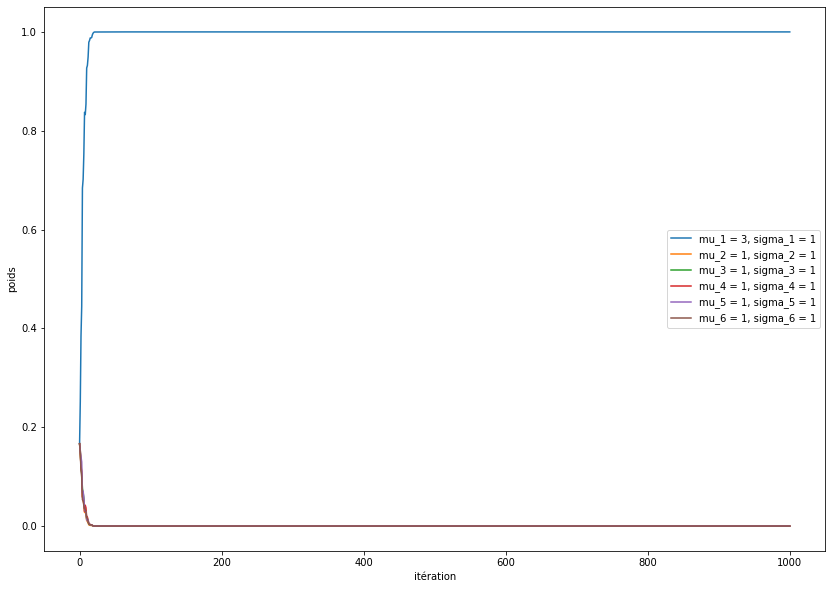

In [ ]:
mu_list = [3,1,1,1,1,1]
sigma_list = [1,1,1,1,1,1]
S0_list = [1,1,1,1,1,1]

S = simuler_action_2(6,S0_list,mu_list,sigma_list)

x0 = np.array([1,1,1,1,1,1])/6 # point de départ 

max_iter=1000
pas = [0.03 for i in range(max_iter)]
opt, chemin, temps_dms = Descente_Mirroir_sto(S, G, grad_h, grad_h_inverse, x0, pas, proj=project_simplexe_bregman, erreur=1e-6, max_iter=1000)
print('Les poids attribués par le modèle sont respectivement :')
print('\t', opt)
print('La somme des poids : {:.3}'.format(np.sum(opt)))
plt.figure(figsize=(14,10))
for i in range(chemin.shape[1]):
  plt.plot(np.arange(chemin.shape[0]), chemin[:,i], label=f'mu_{i+1} = ' +str(mu_list[i]) + f', sigma_{i+1} = ' +str(sigma_list[i]))

plt.xlabel('itération')
plt.ylabel('poids')
plt.legend()

Text(0, 0.5, 'Rendement moyenne')

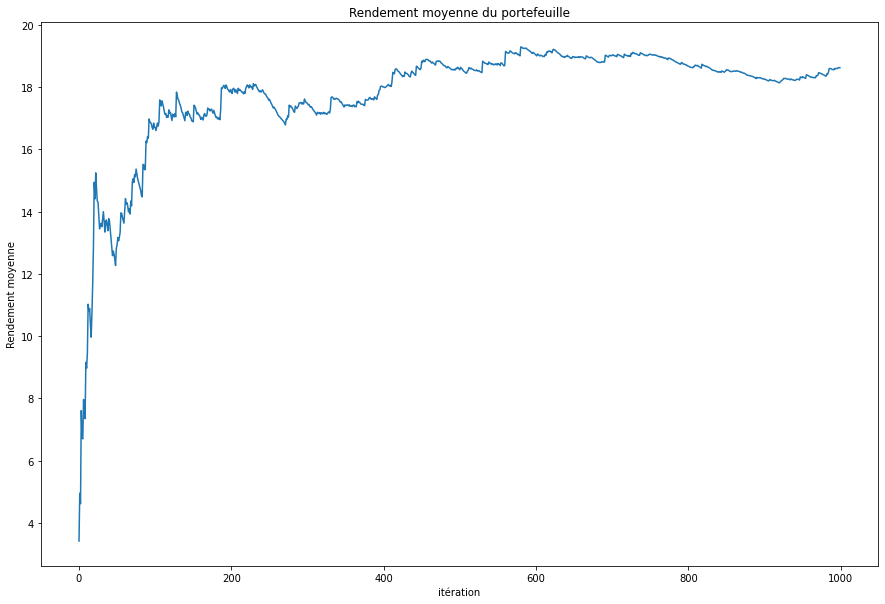

In [ ]:
vect = np.array([chemin[i,:]@S[i,:] for i in range(chemin.shape[0]-1)])
J = np.cumsum(vect)/np.arange(1,len(vect)+1)
plt.figure(figsize = (15,10))
plt.plot(J)
plt.title('Rendement moyenne du portefeuille')
plt.xlabel('itération')
plt.ylabel('Rendement moyenne')

In [ ]:
print('Rendement moyenne final : ',np.mean(np.sum([S[:,i]*opt[i]  for i in range(5)], axis=0)))

Rendement moyenne final :  18.62787070491697


##**Descente miroire stochastique biaisée**

In [ ]:
def biased_SMD(x0, theta_0, step_list, c, S0_list,mu_list,sigma_list, alpha=0.05,max_iter=1000):
  '''

  paramètres :
    x0 : np.array, point de départ
    theta_0 : float, répresente la valeur moyenne de la perte 
    alpha : float, le risque dans [0,1], sa valeur par défaut est 5%
    step_list : np.array, liste de pas de longueur max_iter
    c : float, lambda dans le papier à determiner 
    S0_list : np.array, le prix initial des actions
    mu_list : np.array, shape = (nombre d'actions x0.shape, 100)
    sigma_list : np.array, shape = (nombre d'actions x0.shape, 100)
            !! Ces deux derniers coefficients doivent être estimés à partir du vraies actions. !! 
    

  return :
    np.array representant les poids optimaux 

  Cette algorithme est pris du papier "Manon Costa, Sébastien Gadat, Lorick Huang. Portfolio optimization under CV@R constraint with
  stochastic mirror descent. 2022. ffhal-03697232ff"

  Dans le drive (document.pdf page 7)
  '''
  i = 0
  u_k = x0
  theta_k = theta_0
  n = x0.shape[0]
  Z_k = simuler_action_2(n,S0_list,mu_list,sigma_list,M=max_iter,T=1)# à revoir avec Sébastien
  theta = []
  U = []
  U.append(x0)
  theta.append(theta_0)

  while i < max_iter - 1:
    z_k = Z_k[i,:]
    g_k_1 = (c/(1 - alpha)*(z_k@u_k >= theta_k).astype(int) - 1)*z_k 
    g_k_2 = c * (1 - (z_k@u_k >= theta_k).astype(int)/(1 - alpha))
    u_k = u_k*np.exp(-step_list[i]*g_k_1)/np.sum(np.abs(u_k*np.exp(-step_list[i]*g_k_1)))
    theta_k -= step_list[i]*g_k_2
    i+=1
    U.append(u_k)
    theta.append(theta_k)
  
  return u_k, theta_k, Z_k, U, theta  


###**Exemple simple sur l'algorithme stochastique précédant**

In [ ]:
x0 = np.array([1,1,1,1,1])/5 # point de départ 
theta_0 = 0.2
lambda_ = 0.9
max_iter = 100000
pas = [i**(-0.75) for i in range(1,max_iter+1)]
S0_list = [1,1,1,1,1]
mu_list = [0.12,0.15,0.18,0.2,0.22]
sigma_list = [0.12,0.14,0.17,0.2,0.22]

u, theta, Z_k, U, theta = biased_SMD(x0, theta_0, pas, lambda_, S0_list,mu_list,sigma_list, alpha=0.05,max_iter=max_iter)

Les poids attribués par le modèle sont respectivement :
mu   	 [0.12, 0.15, 0.18, 0.2, 0.22]
sigma	 [0.12, 0.14, 0.17, 0.2, 0.22]
poids	 [0.20812503 0.17442969 0.24835796 0.17423227 0.19485506]
La somme des poids : 1.0
0.04251086773884595


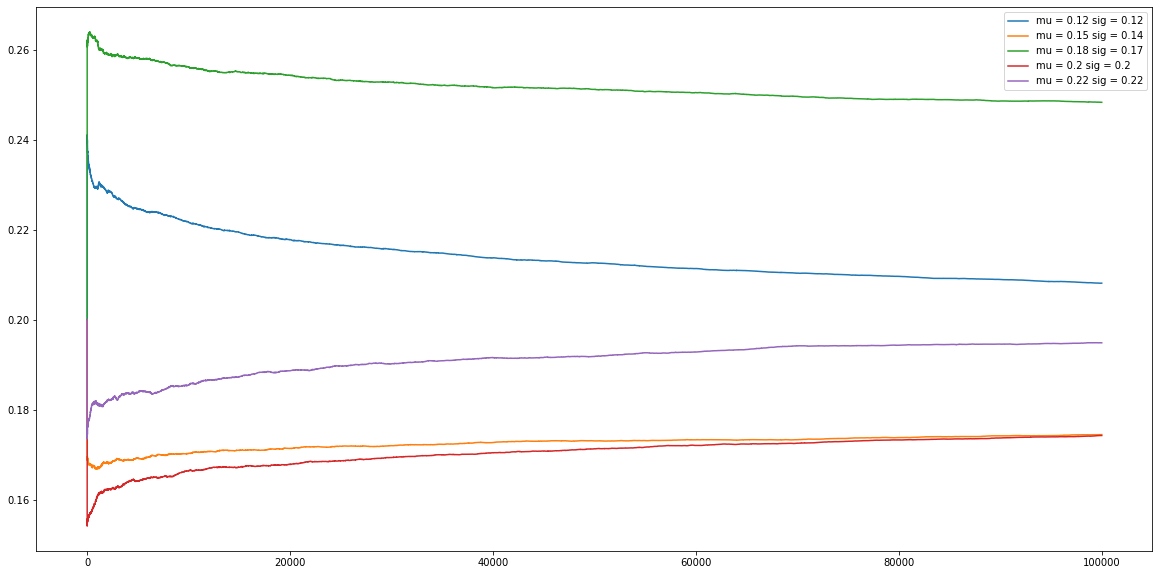

In [ ]:
print('Les poids attribués par le modèle sont respectivement :')
print('mu   \t', mu_list)
print('sigma\t', sigma_list)
print('poids\t', u)
print('La somme des poids : {:.3}'.format(np.sum(u)))
print(theta[-1])
U = np.array(U)

plt.figure(figsize=(20,10))
for i in range(U.shape[1]):
  plt.plot(np.arange(U.shape[0]), U[:,i], label='mu = ' +str(mu_list[i]) + ' sig = ' +str(sigma_list[i]))

plt.legend()

Text(0.5, 1.0, 'Valeur moyenne du Portefeuille')

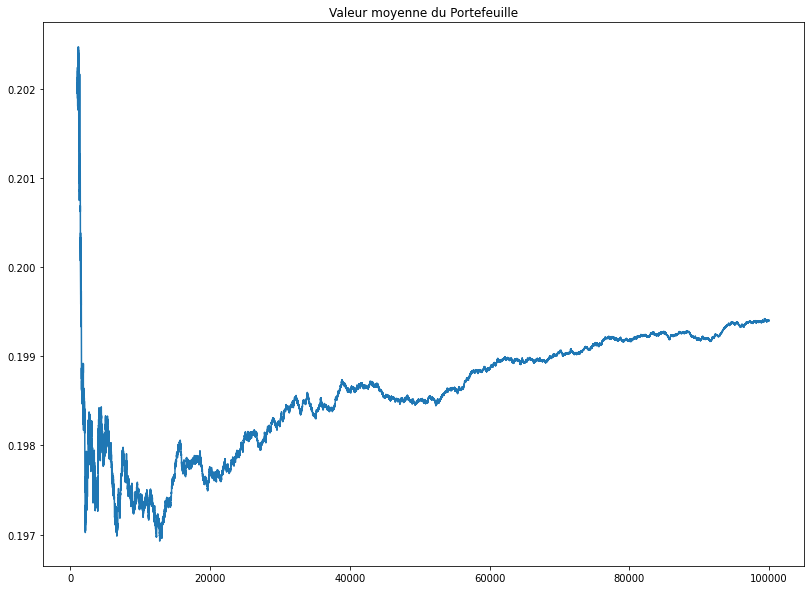

In [ ]:
U = np.array(U)
theta = np.array(theta)
Z_k = np.array(Z_k)
vect = np.array([ U[i,:]@Z_k[i,:] for i in range(U.shape[0])])
J = np.cumsum(vect)/np.arange(1,len(vect)+1)
CVAR = []
CVAR = np.cumsum(theta + np.maximum(vect-theta,0)/(1-0.05))/np.arange(1,len(vect)+1)


plt.figure(figsize=(30,10))
'''
ax1 = plt.subplot(121)
ax1.plot(np.arange(J.shape[0])[1000:], J[1000:])
ax1.set_title("CV@R")
'''
ax2 = plt.subplot(122)
ax2.plot(np.arange(CVAR.shape[0])[1000:], CVAR[1000:])
ax2.set_title("Valeur moyenne du Portefeuille")